## Library needed

In [99]:
#install.packages("dplyr")
#install.packages("imputeTS")
#install.packages("missMDA")
#install.packages("class")
library(dplyr)
library(imputeTS)
library(class)
library(missMDA)

#Clean workSpace
if(!is.null(dev.list())) dev.off()  # Clear plots
rm(list=ls())                       # Clean workSpace

null device 
          1

# Read and select the data
The selection of the data is done according the file List and justify decisions

In [94]:
df <- read.csv("speeddating.csv", sep=",", encoding="UTF-8", na.strings = c("NA"))
df <- select(df, gender, d_age, samerace, pref_o_attractive, pref_o_sincere, pref_o_intelligence, attractive_o, sinsere_o, intelligence_o, attractive_important, sincere_important, intellicence_important, attractive, sincere, intelligence, attractive_partner, intelligence_partner, sincere_partner, interests_correlate, expected_num_interested_in_me, like, guess_prob_liked, decision, decision_o, match)

numericalVariables <- c("d_age", "attractive_o", "sinsere_o", "intelligence_o", "attractive", "sincere", "intelligence", "attractive_partner", "intelligence_partner", "sincere_partner", "interests_correlate", "expected_num_interested_in_me", "like", "guess_prob_liked")
categoricalVariables <- c("pref_o_attractive", "pref_o_sincere", "pref_o_intelligence", "attractive_important","sincere_important", "intellicence_important")
booleanVariables <- c("gender", "samerace","decision", "decision_o", "match")

null device 
          1

# Modify some extrange values
In this section we will replace some values to another that will help us to know what does it means. It is because there are some variables that have the value of the variables with b'value'. We change the b'value' to value, erasing the b'' characters.

In [95]:
df <- mutate(df, gender = case_when(gender == "b'female'" ~ 'F',
                                    gender == "b'male'" ~ 'M'))

df <- mutate(df, samerace = case_when(samerace == "b'0'" ~ '0',
                                      samerace == "b'1'" ~ '1'))

df <- mutate(df, decision = case_when(decision == "b'0'" ~ '0',
                                      decision == "b'1'" ~ '1'))

df <- mutate(df, decision_o = case_when(decision_o == "b'0'" ~ '0',
                                        decision_o == "b'1'" ~ '1'))

df <- mutate(df, match = case_when(match == "b'0'" ~ '0',
                                   match == "b'1'" ~ '1'))

# Remake the ranges of some of categorical data
We have the same think iwith categorical and numerical values. The ranges of the categorical were 3 but we will use 10 ranges shown in metadata file for the categorical varialbes. To do that, we will transform the numerical variable into categorical in order to remake the ranges: 

In [96]:
df <- mutate(df, pref_o_attractive = case_when((pref_o_attractive < 10) ~ 1,
                                               (pref_o_attractive < 20 & pref_o_attractive >= 10) ~ 2,
                                               (pref_o_attractive < 30 & pref_o_attractive >= 20) ~ 3,
                                               (pref_o_attractive < 40 & pref_o_attractive >= 30) ~ 4,
                                               (pref_o_attractive < 50 & pref_o_attractive >= 40) ~ 5,
                                               (pref_o_attractive < 60 & pref_o_attractive >= 50) ~ 6,
                                               (pref_o_attractive < 70 & pref_o_attractive >= 60) ~ 7,
                                               (pref_o_attractive < 80 & pref_o_attractive >= 70) ~ 8,
                                               (pref_o_attractive < 90 & pref_o_attractive >= 80) ~ 9,
                                               (pref_o_attractive <= 100 & pref_o_attractive >= 90) ~ 10))

df <- mutate(df, pref_o_sincere = case_when((pref_o_sincere < 10) ~ 1,
                                            (pref_o_sincere < 20 & pref_o_sincere >= 10) ~ 2,
                                            (pref_o_sincere < 30 & pref_o_sincere >= 20) ~ 3,
                                            (pref_o_sincere < 40 & pref_o_sincere >= 30) ~ 4,
                                            (pref_o_sincere < 50 & pref_o_sincere >= 40) ~ 5,
                                            (pref_o_sincere < 60 & pref_o_sincere >= 50) ~ 6,
                                            (pref_o_sincere < 70 & pref_o_sincere >= 60) ~ 7,
                                            (pref_o_sincere < 80 & pref_o_sincere >= 70) ~ 8,
                                            (pref_o_sincere < 90 & pref_o_sincere >= 80) ~ 9,
                                            (pref_o_sincere <= 100 & pref_o_sincere >= 90) ~ 10))

df <- mutate(df, pref_o_intelligence = case_when((pref_o_intelligence < 10) ~ 1,
                                                 (pref_o_intelligence < 20 & pref_o_intelligence >= 10) ~ 2,
                                                 (pref_o_intelligence < 30 & pref_o_intelligence >= 20) ~ 3,
                                                 (pref_o_intelligence < 40 & pref_o_intelligence >= 30) ~ 4,
                                                 (pref_o_intelligence < 50 & pref_o_intelligence >= 40) ~ 5,
                                                 (pref_o_intelligence < 60 & pref_o_intelligence >= 50) ~ 6,
                                                 (pref_o_intelligence < 70 & pref_o_intelligence >= 60) ~ 7,
                                                 (pref_o_intelligence < 80 & pref_o_intelligence >= 70) ~ 8,
                                                 (pref_o_intelligence < 90 & pref_o_intelligence >= 80) ~ 9,
                                                 (pref_o_intelligence <= 100 & pref_o_intelligence >= 90) ~ 10))

df <- mutate(df, attractive_important = case_when((attractive_important < 10) ~ 1,
                                                  (attractive_important < 20 & attractive_important >= 10) ~ 2,
                                                  (attractive_important < 30 & attractive_important >= 20) ~ 3,
                                                  (attractive_important < 40 & attractive_important >= 30) ~ 4,
                                                  (attractive_important < 50 & attractive_important >= 40) ~ 5,
                                                  (attractive_important < 60 & attractive_important >= 50) ~ 6,
                                                  (attractive_important < 70 & attractive_important >= 60) ~ 7,
                                                  (attractive_important < 80 & attractive_important >= 70) ~ 8,
                                                  (attractive_important < 90 & attractive_important >= 80) ~ 9,
                                                  (attractive_important <= 100 & attractive_important >= 90) ~ 10))

df <- mutate(df, sincere_important = case_when((sincere_important < 10) ~ 1,
                                               (sincere_important < 20 & sincere_important >= 10) ~ 2,
                                               (sincere_important < 30 & sincere_important >= 20) ~ 3,
                                               (sincere_important < 40 & sincere_important >= 30) ~ 4,
                                               (sincere_important < 50 & sincere_important >= 40) ~ 5,
                                               (sincere_important < 60 & sincere_important >= 50) ~ 6,
                                               (sincere_important < 70 & sincere_important >= 60) ~ 7,
                                               (sincere_important < 80 & sincere_important >= 70) ~ 8,
                                               (sincere_important < 90 & sincere_important >= 80) ~ 9,
                                               (sincere_important <= 100 & sincere_important >= 90) ~ 10))

df <- mutate(df, intellicence_important = case_when((intellicence_important < 10) ~ 1,
                                                    (intellicence_important < 20 & intellicence_important >= 10) ~ 2,
                                                    (intellicence_important < 30 & intellicence_important >= 20) ~ 3,
                                                    (intellicence_important < 40 & intellicence_important >= 30) ~ 4,
                                                    (intellicence_important < 50 & intellicence_important >= 40) ~ 5,
                                                    (intellicence_important < 60 & intellicence_important >= 50) ~ 6,
                                                    (intellicence_important < 70 & intellicence_important >= 60) ~ 7,
                                                    (intellicence_important < 80 & intellicence_important >= 70) ~ 8,
                                                    (intellicence_important < 90 & intellicence_important >= 80) ~ 9,
                                                    (intellicence_important <= 100 & intellicence_important >= 90) ~ 10))              

## typing categorical variables as factor

In [97]:
for(cat in categoricalVariables)
  df[cat] <- as.factor(df[,cat])

# Treatment of null values
### Looking for variables with null values

In [98]:
for(var in names(df)) {
  sum <- 0
  
  for(x in is.na(df[var]))
    if(x) sum <- sum + 1
  
  cat("The variable: ", var, " has ", sum, " N/A values\n")
  
}

The variable:  gender  has  0  N/A values
The variable:  d_age  has  0  N/A values
The variable:  samerace  has  0  N/A values
The variable:  pref_o_attractive  has  36  N/A values
The variable:  pref_o_sincere  has  36  N/A values
The variable:  pref_o_intelligence  has  36  N/A values
The variable:  attractive_o  has  20  N/A values
The variable:  sinsere_o  has  33  N/A values
The variable:  intelligence_o  has  36  N/A values
The variable:  attractive_important  has  36  N/A values
The variable:  sincere_important  has  36  N/A values
The variable:  intellicence_important  has  36  N/A values
The variable:  attractive  has  37  N/A values
The variable:  sincere  has  37  N/A values
The variable:  intelligence  has  37  N/A values
The variable:  attractive_partner  has  22  N/A values
The variable:  intelligence_partner  has  38  N/A values
The variable:  sincere_partner  has  36  N/A values
The variable:  interests_correlate  has  73  N/A values
The variable:  expected_num_interest

As we can see, the majority of the variables have null values, and the "expected_num_interested_in_me" have 79% of missing data, so we will delete it.

In [87]:
# Deleting variable "expected_num_interested_in_me"
df <- select(df, -"expected_num_interested_in_me")

## Treatment of numerical variables with null values using mean inputation
#### Calculating the mean

In [88]:
uncompletedNumVars<-c(7,8,9,13,14,15,16,17,18,19,20,21)

vectorMeans <- c()
for(x in uncompletedNumVars) {
  aux <- na.omit(df[,x])
  mean <- 0.0
  for(num in aux)
    mean <- mean + num
  
  mean<-mean/length(aux)
  vectorMeans <- c(vectorMeans, trunc(mean))
}

#### Do the inputation

In [89]:
numericalVariables <- c("d_age", "attractive_o", "sinsere_o", "intelligence_o", "attractive", "sincere", "intelligence", "attractive_partner", "intelligence_partner", "sincere_partner", "interests_correlate", "like", "guess_prob_liked")
nullNumVars <- numericalVariables[-c(1)]

df[,nullNumVars[1]] <- ifelse(is.na(df[,nullNumVars[1]]), vectorMeans[1], df$attractive_o)
df[,nullNumVars[2]] <- ifelse(is.na(df[,nullNumVars[2]]), vectorMeans[2], df$sinsere_o)
df[,nullNumVars[3]] <- ifelse(is.na(df[,nullNumVars[3]]), vectorMeans[3], df$intelligence_o)
df[,nullNumVars[4]] <- ifelse(is.na(df[,nullNumVars[4]]), vectorMeans[4], df$attractive)
df[,nullNumVars[5]] <- ifelse(is.na(df[,nullNumVars[5]]), vectorMeans[5], df$sincere)
df[,nullNumVars[6]] <- ifelse(is.na(df[,nullNumVars[6]]), vectorMeans[6], df$intelligence)
df[,nullNumVars[7]] <- ifelse(is.na(df[,nullNumVars[7]]), vectorMeans[7], df$attractive_partner)
df[,nullNumVars[8]] <- ifelse(is.na(df[,nullNumVars[8]]), vectorMeans[8], df$intelligence_partner)
df[,nullNumVars[9]] <- ifelse(is.na(df[,nullNumVars[9]]), vectorMeans[9], df$sincere_partner)
df[,nullNumVars[10]] <- ifelse(is.na(df[,nullNumVars[10]]), vectorMeans[10], df$interests_correlate)
df[,nullNumVars[11]] <- ifelse(is.na(df[,nullNumVars[11]]), vectorMeans[11], df$like)
df[,nullNumVars[12]] <- ifelse(is.na(df[,nullNumVars[12]]), vectorMeans[12], df$guess_prob_liked)

for(var in numericalVariables) {
  sum <- 0
  
  for(x in is.na(df[var]))
    if(x) sum <- sum + 1
  
  cat("The variable: ", var, " has ", sum, " N/A values\n")
  
}

The variable:  d_age  has  0  N/A values
The variable:  attractive_o  has  0  N/A values
The variable:  sinsere_o  has  0  N/A values
The variable:  intelligence_o  has  0  N/A values
The variable:  attractive  has  0  N/A values
The variable:  sincere  has  0  N/A values
The variable:  intelligence  has  0  N/A values
The variable:  attractive_partner  has  0  N/A values
The variable:  intelligence_partner  has  0  N/A values
The variable:  sincere_partner  has  0  N/A values
The variable:  interests_correlate  has  0  N/A values
The variable:  like  has  0  N/A values
The variable:  guess_prob_liked  has  0  N/A values


As we can see, there aren't null values for numerical variables, so the inputation is done.

## Looking if there are some error values in numerical variables

In [90]:
unique(df[numericalVariables])

,d_age,attractive_o,sinsere_o,intelligence_o,attractive,sincere,intelligence,attractive_partner,intelligence_partner,sincere_partner,interests_correlate,like,guess_prob_liked
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,6,6,8,8,6,8,8,6,7,9,0.14,7,6
2,1,7,8,10,6,8,8,7,7,8,0.54,7,5
3,1,10,10,10,6,8,8,5,9,8,0.16,7,4
4,2,7,8,9,6,8,8,7,8,6,0.61,7,6
5,3,8,7,9,6,8,8,5,7,6,0.21,6,6
6,4,7,7,8,6,8,8,4,7,9,0.25,6,5
7,9,3,6,7,6,8,8,7,7,6,0.34,6,5
8,6,6,7,5,6,8,8,4,7,9,0.50,6,7
9,7,7,7,8,6,8,8,7,8,6,0.28,7,7


The variable attractive_o is a rating betwen 0 and 10 about the atractiveness of his/her partner. As we can see, the maximum is 10.5, so this is an error, so we will assume thas it should be the maximum value (10).

As we can see, the rest of the variables are spected values because they are in the respective ranges shown in the metadata file.

In [91]:
# replacing the value 10.5 to 10 in attractive_o variable
df[,"attractive_o"] <- ifelse(df[,"attractive_o"] > 10, 10, df$attractive_o)

## MCA inputation for categorical variables

In [92]:
uncompletedCatVars<-c(4,5,6,10,11,12)

res.immca<-imputeMCA(df[,uncompletedCatVars],ncp=10)

df[,uncompletedCatVars]<-res.immca$completeObs


for(var in categoricalVariables) {
  sum <- 0
  
  for(x in is.na(df[var]))
    if(x) sum <- sum + 1
  
  cat("The variable: ", var, " has ", sum, " N/A values\n")
  
}

The variable:  pref_o_attractive  has  0  N/A values
The variable:  pref_o_sincere  has  0  N/A values
The variable:  pref_o_intelligence  has  0  N/A values
The variable:  attractive_important  has  0  N/A values
The variable:  sincere_important  has  0  N/A values
The variable:  intellicence_important  has  0  N/A values


As we can see, there aren't any missing data, so the inputation is done.

## Looking if there are some error values in categorical variables

In [93]:
summary(df[categoricalVariables])

 pref_o_attractive pref_o_sincere pref_o_intelligence attractive_important
 3      :470       1:142          1: 30               3      :446         
 2      :283       2:453          2:206               2      :359         
 4      :225       3:545          3:744               4      :213         
 5      : 78       4: 48          4:166               6      : 62         
 6      : 72                      5: 26               5      : 48         
 1      : 30                      6: 16               1      : 30         
 (Other): 30                                          (Other): 30         
 sincere_important intellicence_important
 1:112             1: 30                 
 2:437             2:203                 
 3:565             3:751                 
 4: 74             4:162                 
                   5: 26                 
                   6: 16                 
                                         

As we can see, the labels are the expeted ([0,10]). Thoose ranges are shown in the metadata file

## Looking if there are some null values in binary variables

In [ ]:
for(var in booleanVariables) {
  sum <- 0
  
  for(x in is.na(df[var]))
    if(x) sum <- sum + 1
  
  cat("The variable: ", var, " has ", sum, " N/A values\n")
  
}

The variable:  gender  has  0  N/A values
The variable:  samerace  has  0  N/A values
The variable:  decision  has  1  N/A values
The variable:  decision_o  has  1  N/A values
The variable:  match  has  1  N/A values


As we can see, all the null values for binary variables are 0. It means that we dont have null values in binary variables. 

## Looking if there are some error values in binary variables

In [ ]:
for(x in booleanVariables)
  print(unique(df[x]))

    gender
1        F
101      M
  samerace
1        0
3        1
     decision
1           1
6           0
1188     <NA>
     decision_o
1             0
3             1
1188       <NA>
     match
1        0
3        1
1188  <NA>


As we can see, in the gender there are only two possible values M or F and in the other variables only can be 0 or 1. Thoose are expected values according to the metadata file

# Outlayers

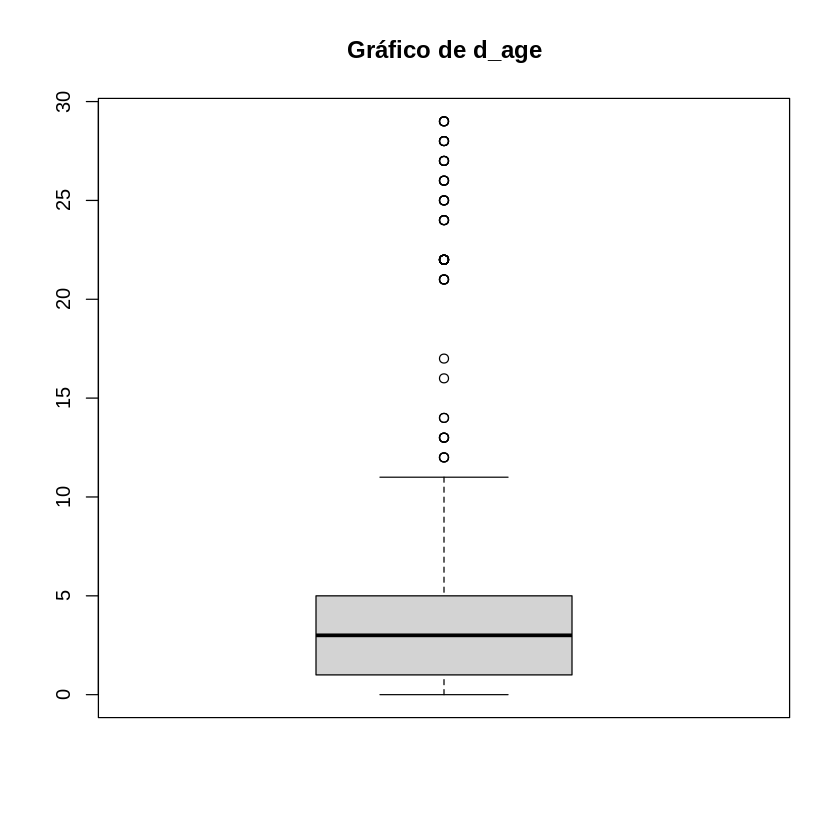

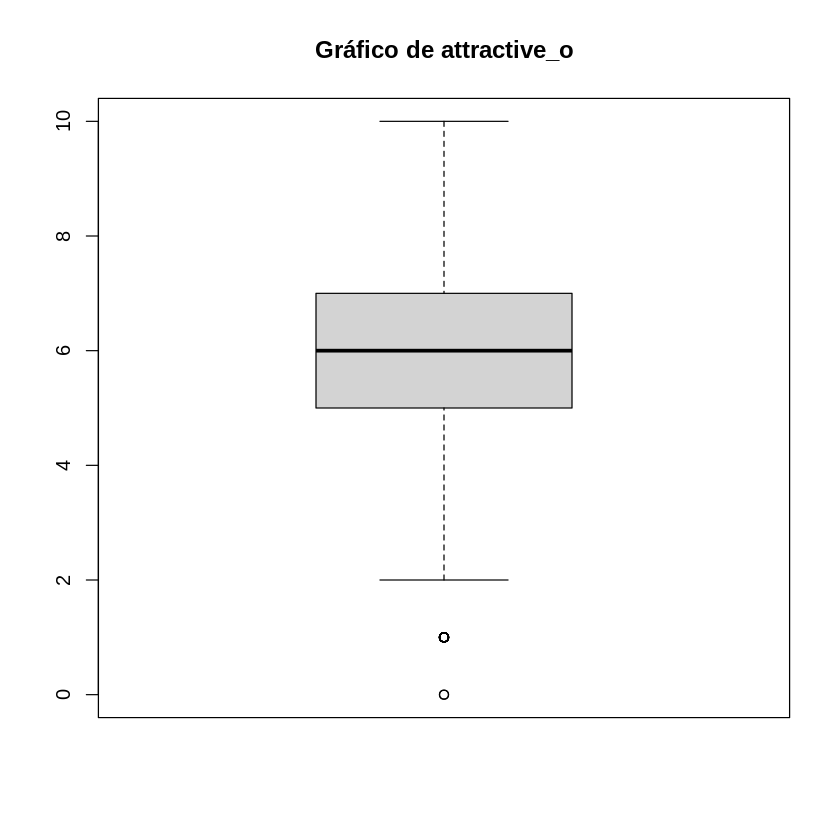

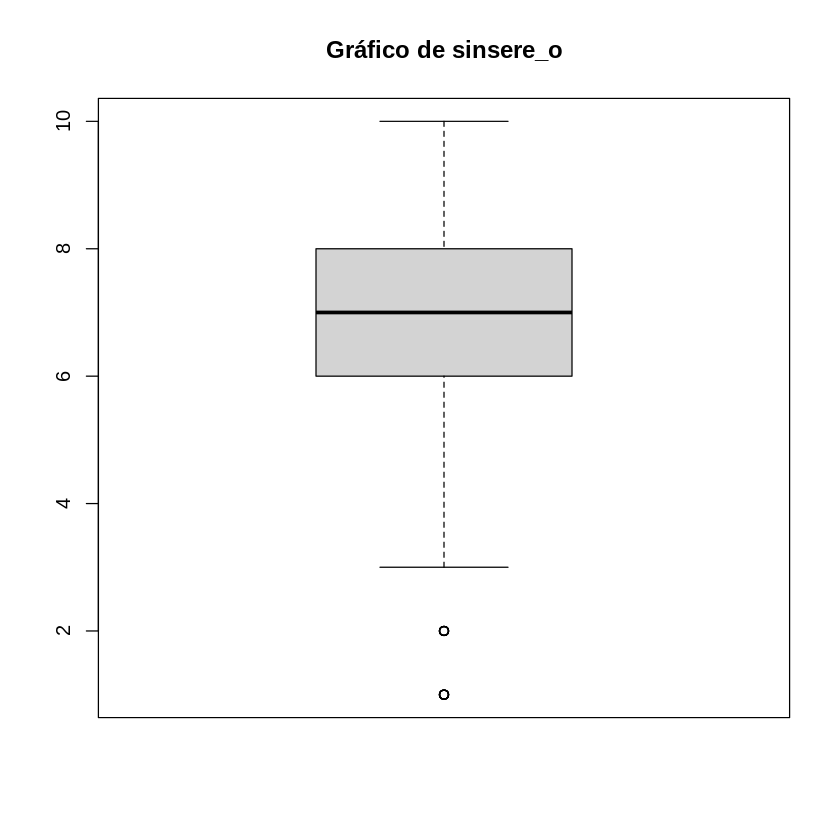

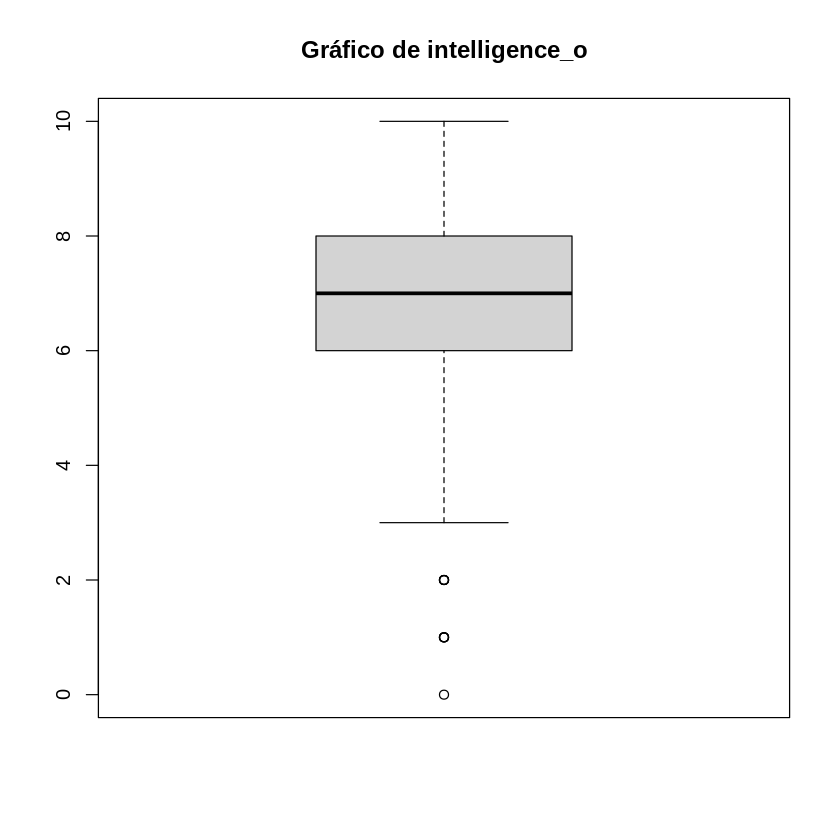

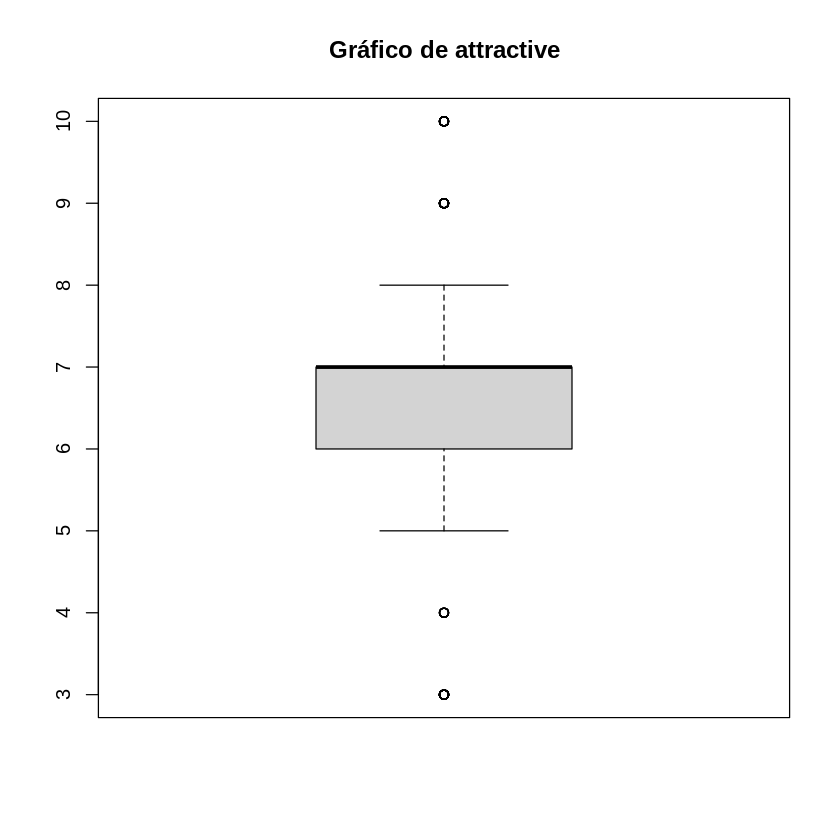

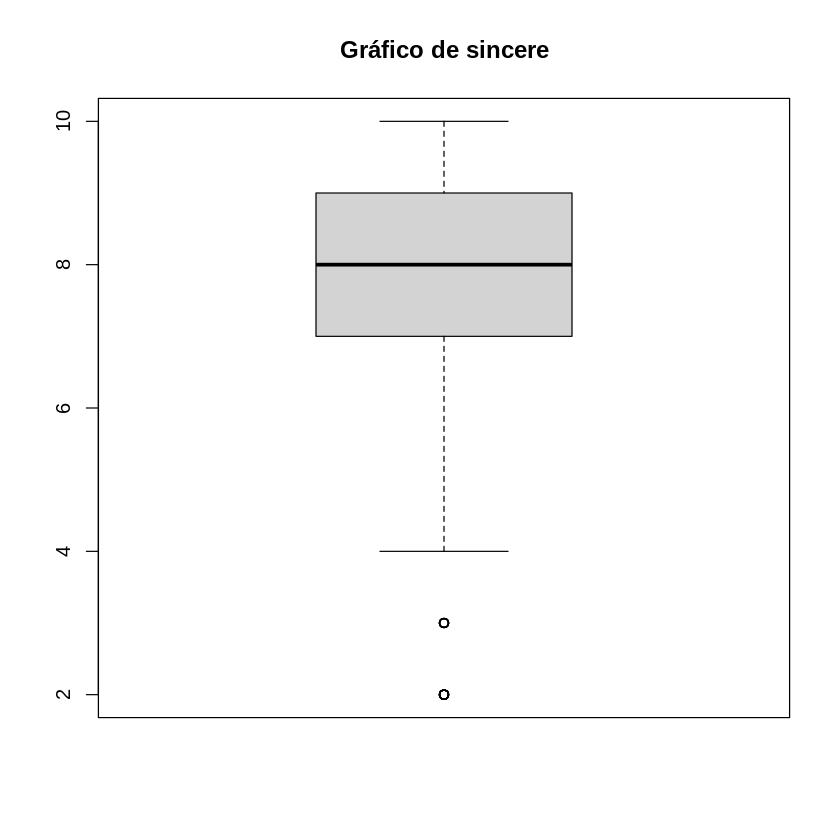

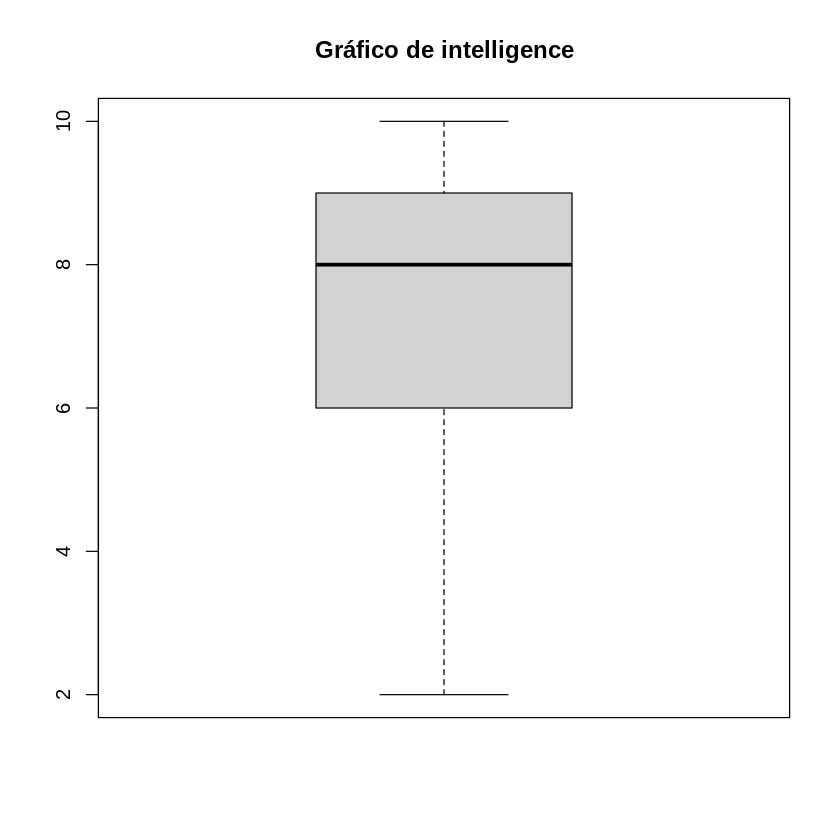

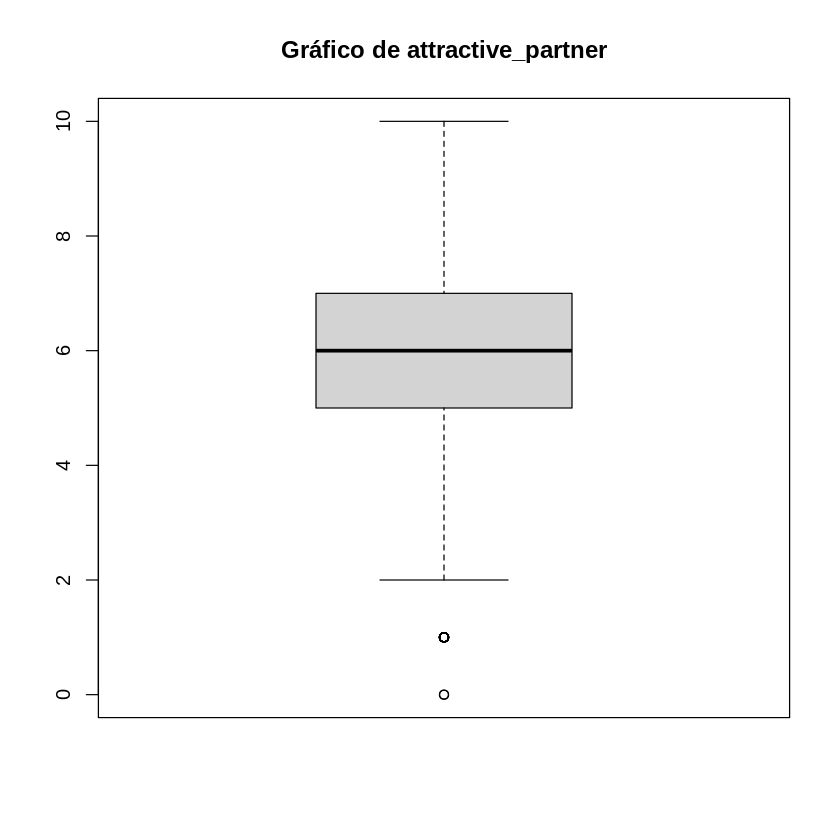

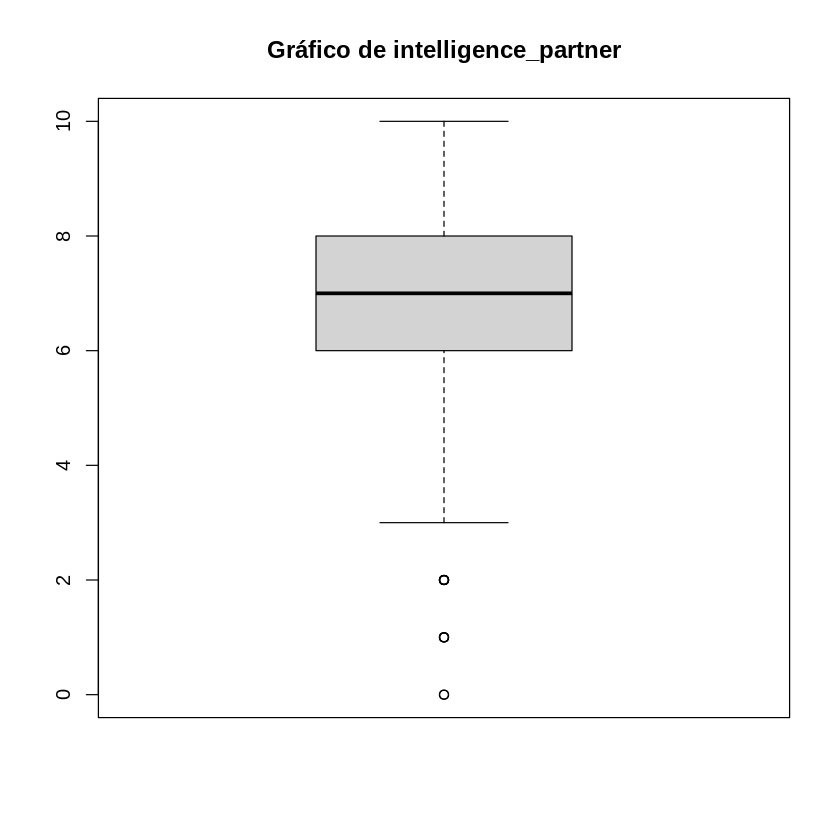

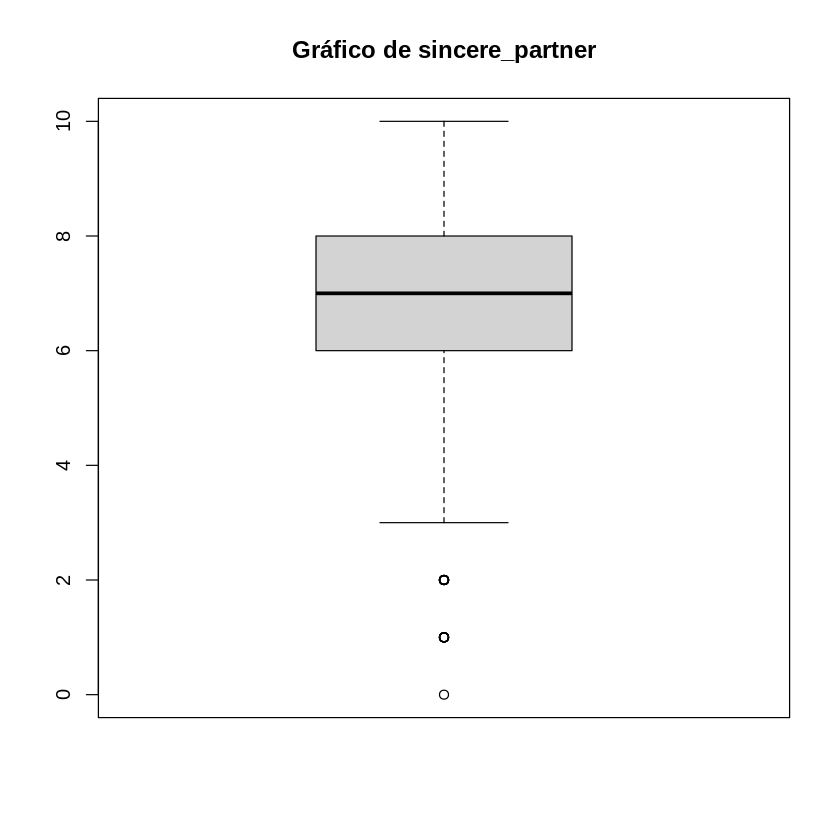

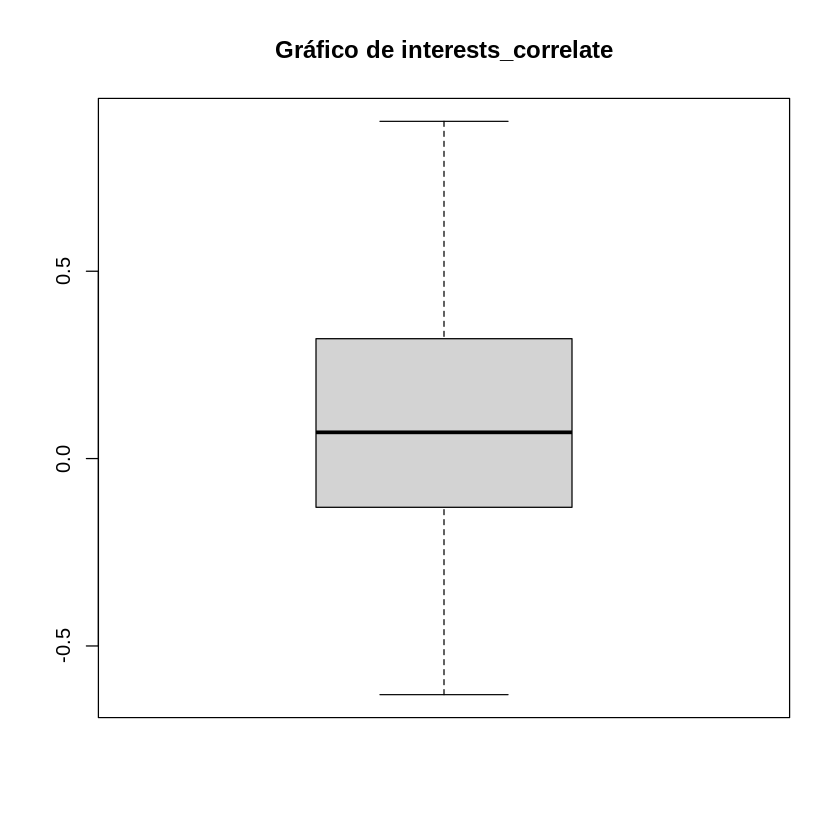

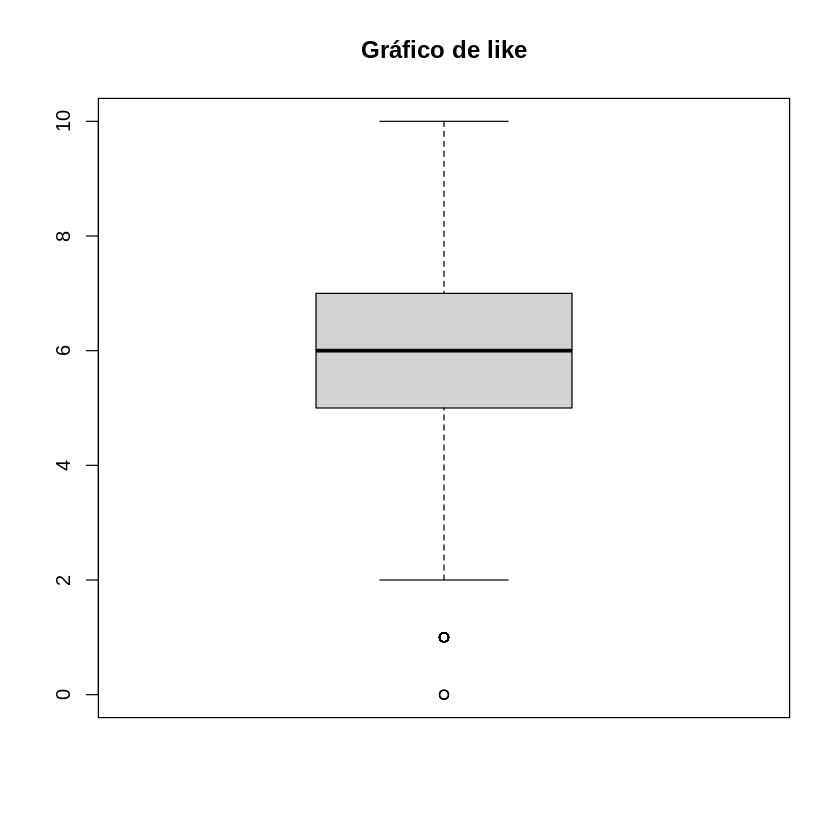

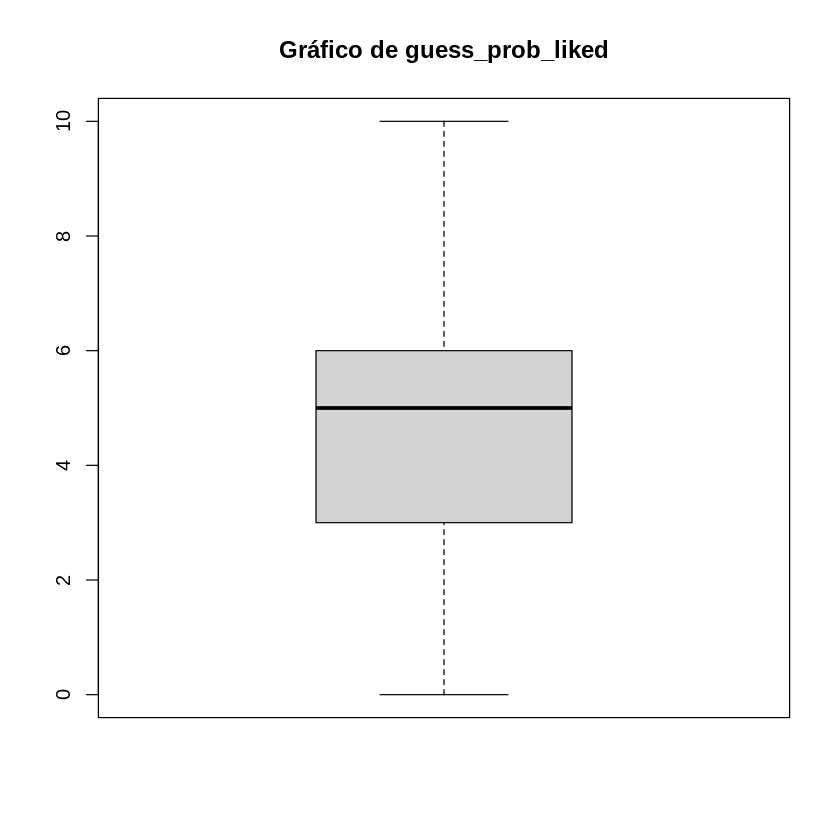

In [ ]:
boxplot(df[,c("d_age")], main = "Gráfico de d_age")
boxplot(df[,c("attractive_o")], main = "Gráfico de attractive_o")
boxplot(df[,c("sinsere_o")], main = "Gráfico de sinsere_o")
boxplot(df[,c("intelligence_o")], main = "Gráfico de intelligence_o")
boxplot(df[,c("attractive")], main = "Gráfico de attractive")
boxplot(df[,c("sincere")], main = "Gráfico de sincere")
boxplot(df[,c("intelligence")], main = "Gráfico de intelligence")
boxplot(df[,c("attractive_partner")], main = "Gráfico de attractive_partner")
boxplot(df[,c("intelligence_partner")], main = "Gráfico de intelligence_partner")
boxplot(df[,c("sincere_partner")], main = "Gráfico de sincere_partner")
boxplot(df[,c("interests_correlate")], main = "Gráfico de interests_correlate")
boxplot(df[,c("like")], main = "Gráfico de like")
boxplot(df[,c("guess_prob_liked")], main = "Gráfico de guess_prob_liked")

As we can see at plots, some of the variables have outlayers, but thoos are in the esperated interval and can be possible. For this reason we won't delete thoose values because if we do it, we are losing information of possible values.